
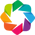

In [1]:
import pandas as pd
import numpy as np
import holoviews as hv
import parsing
hv.extension('bokeh', 'matplotlib')

KUHN_GAME = 'games/kuhn.txt'
KUHN_SEQ = 'json/kuhn_sequences.json'
KUHN_DATA = 'json/kuhn_datapoints.json'
LEDUC3_GAME = 'games/leduc3.txt'
LEDUC3_SEQ = 'json/leduc3_sequences.json'
LEDUC3_DATA = 'json/leduc3_datapoints.json'

In [2]:
p1, p2 = parsing.processInfosets(LEDUC3_GAME)
parsing.processSeqIDs(p1,p2,LEDUC3_SEQ)
parsing.getData(p1,p2,LEDUC3_DATA)

In [14]:
for infoset in p2.values():
    if len(infoset.actions) >= 3:
        break
i = infoset

In [19]:
curves = None
for action in i.actions:    
    xs = [x+1 for x in range(len(i.probs))]
    ys = [i.probs[j][action] for j in range(len(i.probs))]
    curve = hv.Curve((xs,ys),('Iterations','Iterations'),(action,'Probability of '+action))
    if curves == None:
        curves = curve
    else:
        curves = curves + curve
curves

:Layout
   .Curve.I   :Curve   [Iterations]   (raise4)
   .Curve.II  :Curve   [Iterations]   (c)
   .Curve.III :Curve   [Iterations]   (f)

In [36]:
def genCurves(infoset):
    '''
    generate the Holoview Curves object corresponding to the infoset
    '''
    curves = None
    for action in infoset.actions:    
        xs = [x+1 for x in range(len(infoset.probs))]
        ys = [infoset.probs[j][action] for j in range(len(infoset.probs))]
        curve = hv.Curve((xs,ys),('Iterations','Iterations'),(action,'Probability of '+action),
                        label=action)
        if curves == None:
            curves = curve
        else:
            curves = curves * curve
    return curves


hm1 = hv.HoloMap({(i.player,name): genCurves(i) for p in (p1,p2) for name,i in p.items()},kdims=['player','infoset'])
hm1

:HoloMap   [player,infoset]
   :Overlay
      .Curve.Raise4 :Curve   [Iterations]   (raise4)
      .Curve.C      :Curve   [Iterations]   (c)
      .Curve.F      :Curve   [Iterations]   (f)